In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def stim(cur_time, val, start, end):
    if start <= cur_time <= end:
        return val
    else:
        return 0

def covalent_mod_cycle(t, y, rate_constants):
    s, c1, e1, p, c2, e2 = y
    k1, k2, k11, k4, k3, k33, stim_val, stim_start, stim_end = rate_constants
    
    # Substrate 1
    ds_dt = -k1*s*e1 + k11*c1 + k4*c2 + stim(t, stim_val, stim_start, stim_end)
    
    # Enzyme 1
    de1_dt = -k1*s*e1 + (k11 + k2)*c1
    
    # Complex 1
    dc1_dt = k1*s*e1 - (k11 + k2)*c1
    
    # Product
    dp_dt = k2*c1 - k3*p*e2 + k33*c2
    
    # Enzyme 2
    de2_dt = -k3*p*e2 + (k33+k4)*c2
    
    # Complex 2
    dc2_dt = k3*p*e2 - (k33 + k4)*c2
    
    return [ds_dt, dc1_dt, de1_dt, dp_dt, dc2_dt, de2_dt]

In [ ]:
T_MAX = 100

# Initial values
init_dict = {"S1": 0, 
             "C1": 0, 
             "E1": 0.25, 
             "P1": 0, 
             "C2": 0, 
             "E2": 0.25}
initial_values = [v for v in init_dict.values()]

# Rate constants
rate_constant_dict = {"k1": 100, 
                      "k2": 2, 
                      "k11": 10, 
                      "k4": 2, 
                      "k3": 10, 
                      "k33": 10, 
                      "stim_val": 0.1, 
                      "stim_start": 20, 
                      "stim_end": 25}
rate_constants = [[i  for i in rate_constant_dict.values()]]


# Solution
solution = solve_ivp(
    fun=covalent_mod_cycle,
    t_span=[0, T_MAX],
    y0=initial_values,
    args=rate_constants,
    rtol = 1e-11, 
    atol = 1e-13,
    method = 'BDF', 
    dense_output = True
)


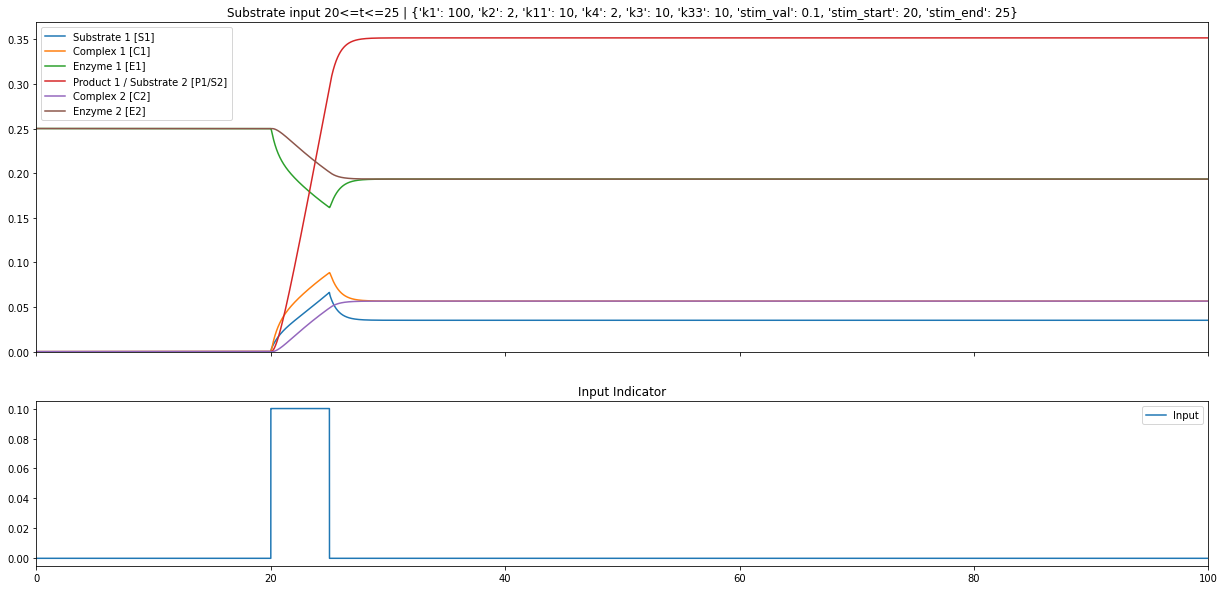

In [21]:
stimulation_indicator = [stim(i, 
                              rate_constants[0][6], 
                              rate_constants[0][7], 
                              rate_constants[0][8]) for i in solution.t]


fig, ax = plt.subplots(
    2, 1, figsize=(21, 10), gridspec_kw={"height_ratios": [2, 1]}, sharex=True
)
ax[0].set_title(f"Substrate input {rate_constants[0][7]}<=t<={rate_constants[0][8]} | {rate_constant_dict}")
ax[0].plot(solution.t, solution.y[0], label="Substrate 1 [S1]")
ax[0].plot(solution.t, solution.y[1], label="Complex 1 [C1]")
ax[0].plot(solution.t, solution.y[2], label="Enzyme 1 [E1]")
ax[0].plot(solution.t, solution.y[3], label="Product 1 / Substrate 2 [P1/S2]")
ax[0].plot(solution.t, solution.y[4], label="Complex 2 [C2]")
ax[0].plot(solution.t, solution.y[5], label="Enzyme 2 [E2]")
ax[0].set_xlim(left=0, right=max(solution.t))
ax[0].set_ylim(bottom=0)
ax[0].legend()
ax[1].set_title("Input Indicator")
ax[1].plot(solution.t, stimulation_indicator, label="Input")
plt.legend()
plt.show()